<a href="https://colab.research.google.com/github/sajacaros/bootcamp_colab/blob/main/Linear_Regression_Python_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from sklearn.datasets import make_regression

# Generate Data
x, y = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=5.0, random_state=42)
y_ = y.reshape(-1, 1)
data = pd.DataFrame({"x" : x.reshape(-1, ), "y" : y})
data

,x,y
0,-1.758739,-31.113105
1,1.031845,10.393095
2,-0.487606,-13.048431
3,0.186454,-0.433708
4,0.725767,12.630296
...,...,...
995,-1.918771,-27.321248
996,0.482472,10.835759
997,0.241962,6.059165
998,1.366874,30.125283


In [2]:
x.shape, y.shape, y_.shape

((1000, 1), (1000,), (1000, 1))

<Axes: xlabel='x', ylabel='y'>

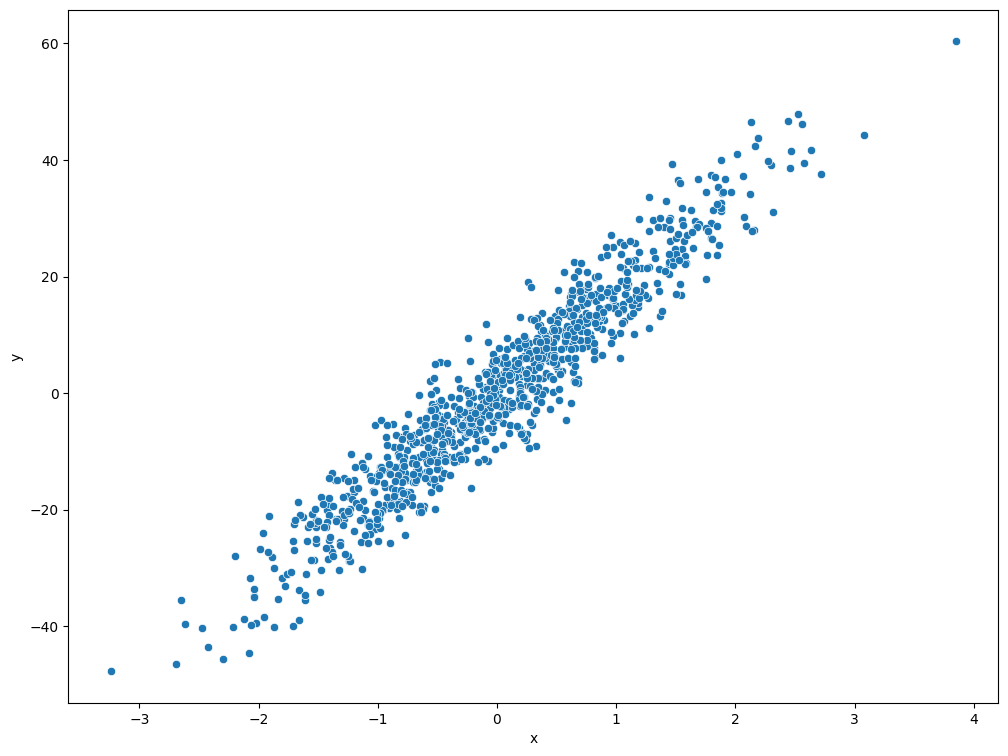

In [3]:
# Data visualization
sns.scatterplot(data=data, x='x', y='y')

In [4]:
# Make Gradient Descent
def mean_squared_error(y, y_hat):
    return np.mean(np.square(y - y_hat))

w_list = []
b_list = []
mse_list = []

def gradient_descent(w=0.1, b=0.1, learning_rate=1e-2, max_iter=100, tol=1e-4):

    '''
        - 2차원에서의 단변량 Linear Regression 모델의 gradient descent algorithm을 구현합니다.
        - y = wx + b로 정의되며, learning_rate를 입력받아 epochs 만큼 weight update를 진행합니다.
        - max_iter만큼 진행하다가 주어진 max_iter전에 수렴한 것 같다면 멈춰도 됩니다.
        - 수렴 조건은 업데이트 되는 loss가 tol 이하일 때를 의미합니다.
    '''

    ## TO-DO ##
    # gradient descent algorithm 구현하기

    def gradient(w_, b_):
        grad_w = 2 * x ** 2 * w_ + 2 * (x*b - x*y_) # y가 들어가있으면 minus(-)
        grad_b = 2 * b_ + 2 * (w*x - y_)
        return np.sum(grad_w), np.sum(grad_b)

    def f_(w, b):
        return w * x + b

    for idx in range(max_iter):
        delta_w, delta_b = gradient(w, b)
        w = w - learning_rate * delta_w
        b = b - learning_rate * delta_b

        y_hat = f_(w, b)
        mse = mean_squared_error(y_, y_hat)
        w_list.append(w)
        b_list.append(b)
        mse_list.append(mse)

        if idx % (10**(len(str(idx))-1)) == 0:
            print(f"{idx}'s mse : {mse}, delta_w : {delta_w}, delta_b : {delta_b}")
        if mse < tol:
            print(f"{idx}th, mse({mse}), w : {w}, b : {b}, delta_w : {delta_w}, delta_b : {delta_b}")
            break

    return w, b

In [5]:
arr = np.array([[1,2,3], [4,5,6]])
np.insert(arr, arr.shape[1], 1, axis=1)

array([[1, 2, 3, 1],
       [4, 5, 6, 1]])

In [6]:
w, b = gradient_descent(max_iter=10000, learning_rate=0.0001,) #tol=24.5046)
print(f'w : {w}, b : {b}')

0's mse : 196.81800341862754, delta_w : -31794.42546562043, delta_b : -486.73455164409853
1's mse : 137.09943268712115, delta_w : -25698.9592940437, delta_b : -266.45731972725105
2's mse : 98.08416192158629, delta_w : -20772.575906656686, delta_b : -113.80311265217671
3's mse : 72.59234638944959, delta_w : -16790.952414680716, delta_b : -10.727170721544724
4's mse : 55.93495488664476, delta_w : -13572.828467857951, delta_b : 56.338989300887846
5's mse : 45.04935227422237, delta_w : -10971.735764483601, delta_b : 97.54932696220587
6's mse : 37.934983089812874, delta_w : -8869.316753515843, delta_b : 120.46070322312563
7's mse : 33.28492955628524, delta_w : -7169.927006302717, delta_b : 130.66098789547124
8's mse : 30.24533020505526, delta_w : -5796.27450329117, delta_b : 132.2506761419461
9's mse : 28.2582711074684, delta_w : -4685.896538611961, delta_b : 128.21132136538597
10's mse : 26.959177338404427, delta_w : -3788.3132706492734, delta_b : 120.68665978472623
20's mse : 24.539748868

<Axes: xlabel='x', ylabel='y'>

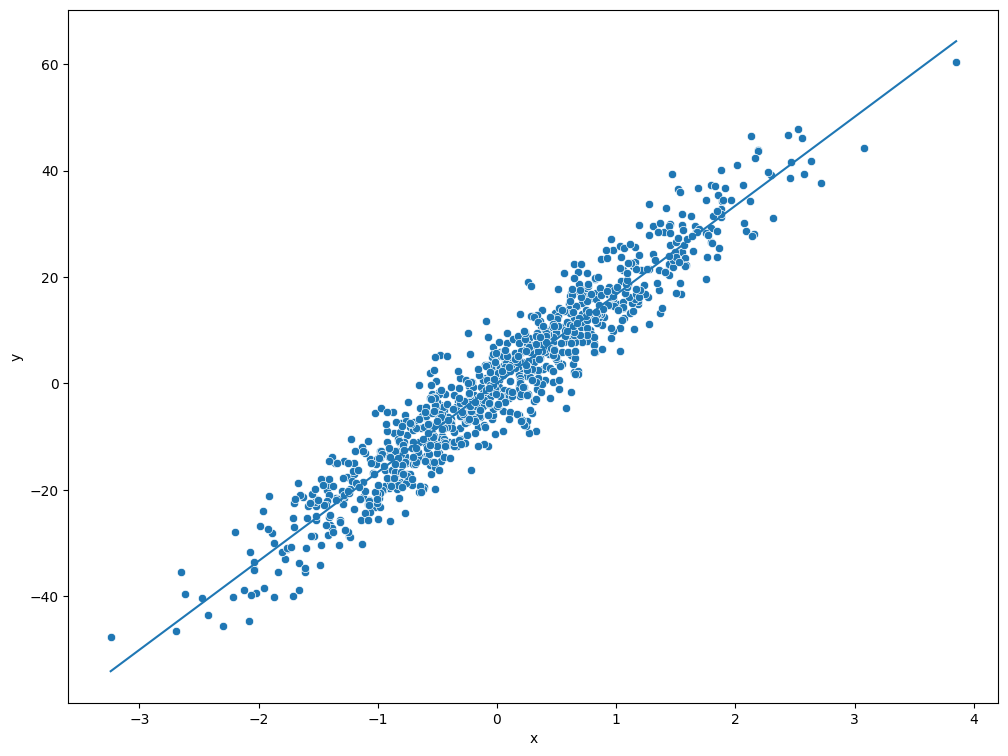

In [7]:
# Visualize Result
sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=data['x'], y=w*data['x'] + b)

<Axes: >

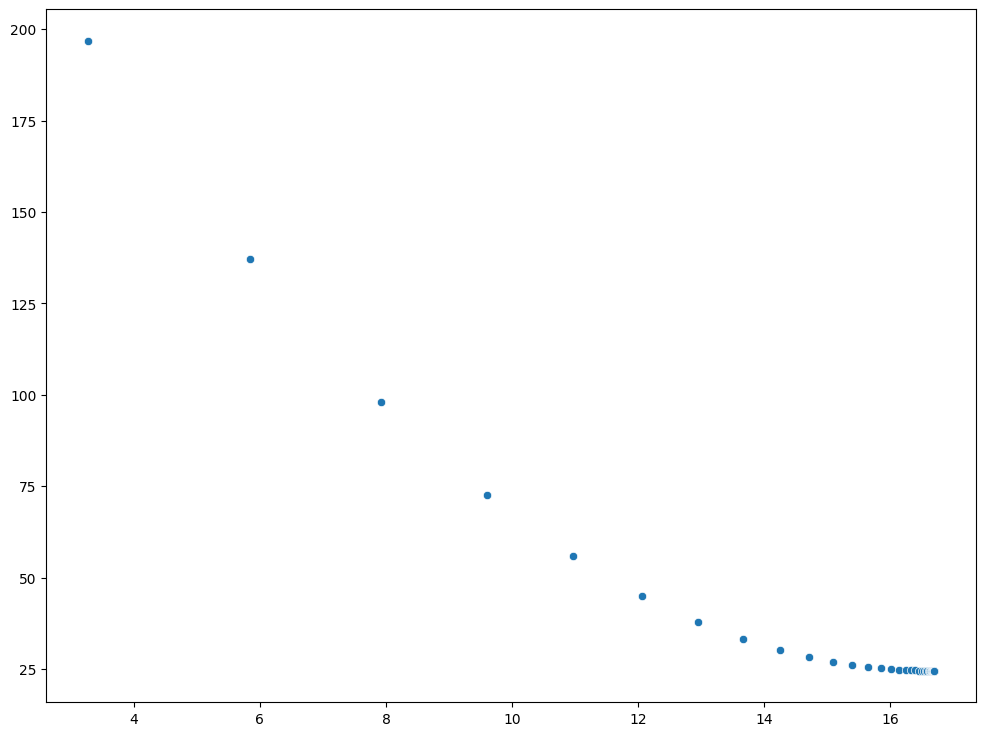

In [8]:
sns.scatterplot(x=w_list, y=mse_list)

In [9]:
np.argmin(np.array(mse_list)), np.min(np.array(mse_list))

(93, 24.504518812819995)